
# Project: Investigate a Dataset - [TMDb Movie Data Set]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have choosen TMdb movie data for the data analysis.In this dataset 10000 movies information were listed including user ratings and revenues. the data was collected from the TMDb.I would like to do further inverstigation from my side and would like to find interesting patterns from it.

## My Approach
### Preview and cleaning the data
>1.Remove unnecessary information that are not useful for analysis Inspection for any null and duplicated values Change data types if needed.

>2.Explore the data and draw conclusion to answer questions.

>3.Study the stats to find meaningful information. Group and filter certain data to find important patterns Plot above data and make visualization to show the results

### Question(s) for Analysis
>1.Which movie perform best to the market?

>2.Which movies have the highest and least profit, budget?

>3.How does popularity affect the profit?

>4.Which years do movies made the maximum profits?

>5.What are the top casts, directors?

>6.Which months have higher profits??

In [129]:
# Import the necessary liabraries for investigation of  project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [130]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv(r"C:\Users\Ashim\Downloads\tmdb-movies.csv")
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### Data Cleaning

>1. Firstly we need to gather the basic information about the structure of the data set we are dealing.

In [131]:
df.info() #to find the information about the dataset used the function info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [132]:
# Calculate the stats for the each columns using describe function
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

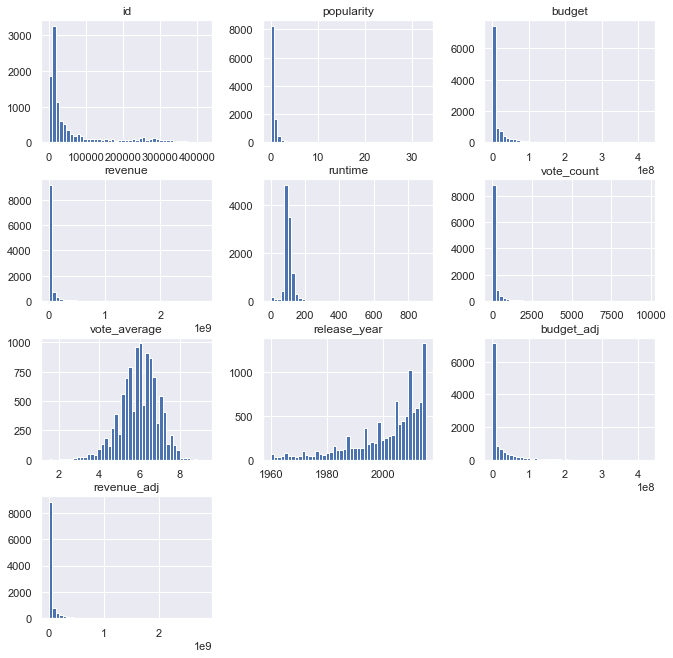

In [133]:
#creating histogram from the data for each properties
df.hist(figsize=(11,11),bins=45)

In [134]:
# Deletion of unneccessary colums using the function drop
df.drop(['id','imdb_id','homepage','keywords','tagline','overview',
         'production_companies','vote_count','vote_average','budget_adj','revenue_adj'],axis=1,inplace=True)

In [135]:
df.shape

(10866, 10)

>2.Changing the datatypes for inline columns

>a.Budget, Revenue, Popularity from String to int

>b.release_date to datetime format

In [136]:
df['release_date']=pd.to_datetime(df['release_date'])
df['budget']=df['budget'].astype(int)
df['popularity']=df['popularity'].astype(int)
df['revenue']=df['revenue'].astype(int)

## Check for duplicates

In [137]:
df.duplicated().sum()   #check duplicates sum

1

In [138]:
# dropping the duplicates
df=df.drop_duplicates(keep=False)
df.duplicated().sum()

0

## Check for missing values in the dataset and fill with zeros


In [139]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [140]:
df.fillna(0,inplace=True)

In [141]:
# drop rows with zero values in budget and revenue as budget and revenue should not have zero values
df['revenue']=df['revenue'].replace(0,np.NaN)
df['budget']=df['budget'].replace(0,np.NaN)
df.dropna(inplace=True)

In [142]:
#Checking value to be removed
print(df.isnull().sum())
print(df.duplicated().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64
0


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (The movie perform best to the market)

In [143]:
#create a new column for the profit to find the answer to above question and make sure the data type is integer
df['profit']=df['revenue']-df['budget']   #as profit=revenue- budget
df['revenue']=df['revenue'].astype(int)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09


In [144]:
#Sorting the profit table value in descending order and shows the top 5 rows
df.sort_values(['profit'], ascending=False).head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
3,11,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
5231,4,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,1.645034e+09
0,32,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
4,9,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09
4361,7,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,2012,1.299558e+09


The above 5 movies earned the most profit.From above data we can depict that Star Wars: The Force Awakens top the list with highest profit.

# Question 2. Which movies have the highest and least profit, budget?

In [145]:
# Define a function to find the maximum and minimun of movies from each categories.
def min_max_data(column_name): 
    # Find the max from the index number in the column, store to df    
    highest_movie = df[column_name].idxmax()    
    highest_movie_df = pd.DataFrame(df.loc[highest_movie])        
    # Find the min from the index number in the column, store to df    
    lowest_movie = df[column_name].idxmin()    
    lowest_movie_df = pd.DataFrame(df.loc[lowest_movie])        
    #concatenating two dfs    
    min_max_data = pd.concat([highest_movie_df, lowest_movie_df], axis = 1)
    return min_max_data

min_max_data('profit')

,3,1386
popularity,11,9
budget,200000000.0,237000000.0
revenue,2068178225,-1513461449
original_title,Star Wars: The Force Awakens,Avatar
cast,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,J.J. Abrams,James Cameron
runtime,136,162
genres,Action|Adventure|Science Fiction|Fantasy,Action|Adventure|Fantasy|Science Fiction
release_date,2015-12-15 00:00:00,2009-12-10 00:00:00
release_year,2015,2009


In [146]:
min_max_data('budget')   # used the same above function for budget too

,2244,2618
popularity,0,0
budget,425000000.0,1.0
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


In [147]:
df.describe()

,popularity,budget,revenue,runtime,release_year,profit
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3.853000e+03
mean,0.710096,3.720557e+07,1.065996e+08,109.224760,2001.258759,6.939404e+07
std,1.472593,4.221354e+07,1.731946e+08,19.923474,11.283161,1.481897e+08
min,0.000000,1.000000e+00,-1.513461e+09,15.000000,1960.000000,-1.750461e+09
25%,0.000000,1.000000e+07,1.359691e+07,95.000000,1995.000000,-1.324619e+06
50%,0.000000,2.400000e+07,4.479322e+07,106.000000,2004.000000,2.000718e+07
75%,1.000000,5.000000e+07,1.240338e+08,119.000000,2010.000000,8.164316e+07
max,32.000000,4.250000e+08,2.068178e+09,338.000000,2015.000000,1.868178e+09


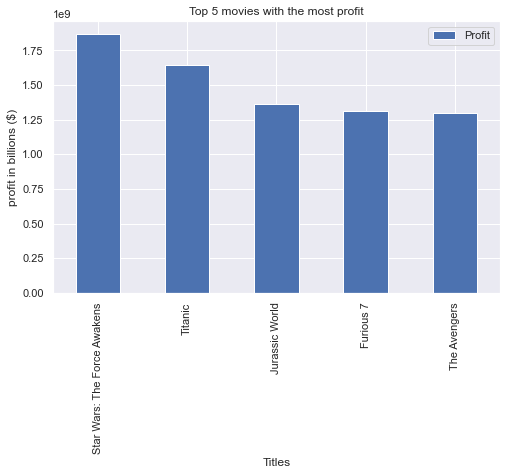

In [148]:
# Create a bar graph for the top 10 most profitable movies 


# First sort the raw data by the profit.
sorted_profit = df['profit'].sort_values(ascending=False)[:5]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
max_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
max_profit['Titles']=titles
max_profit['Profit']=profit
max_profit.set_index('Titles',inplace=True)

# Plot
max_profit.plot(kind ='bar',figsize=(8,5))
plt.title('Top 5 movies with the most profit');
plt.ylabel('profit in billions ($)');
sns.set_style('darkgrid')

From the above, the movie Starwars made the most profit out of all movies from the dataset, its profit is close to one and half the profit earn by 'the Net' on top 5 from the list

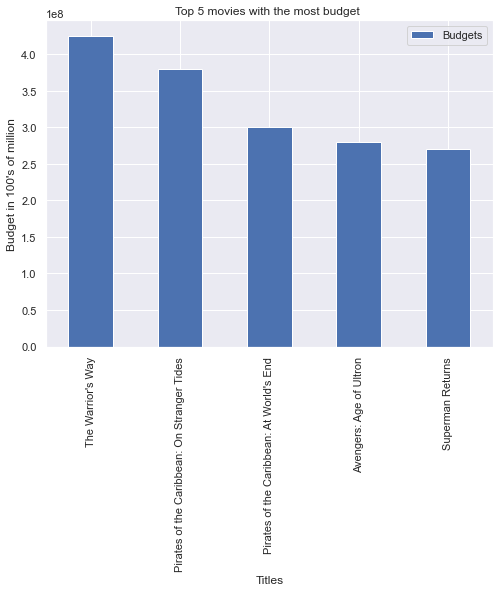

In [149]:
# DO the same for Budget
profitable_year = df.groupby('release_year')['budget'].sum()
profitable_year.head(5)# See the top 5 movies with the most expense
sorted_budget = df['budget'].sort_values(ascending=False)[:5]
max_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
max_budget['Titles']=titles_exp
max_budget['Budgets']=budgets
max_budget.set_index('Titles',inplace=True)
max_budget.plot(kind ='bar',figsize=(8,6))
plt.title('Top 5 movies with the most budget ');
plt.ylabel('Budget in 100\'s of million');

The above showed the top 5 budget spent by the movies. The movie 'The Warrior's way spent about 400 miliions, which is way more than most movies earned profitan and it might not be one of those most successful movie

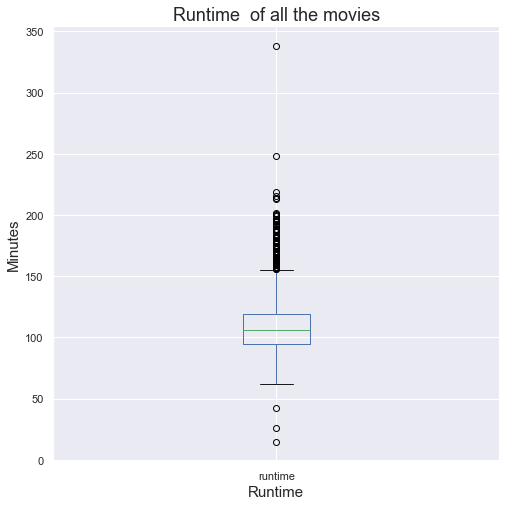

In [150]:
# Box plot for Runtime of the movies.

df['runtime'].plot(kind = 'box', figsize = (8,8));
plt.ylabel('Minutes', fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.title('Runtime  of all the movies', fontsize=18);

Here is the Box plot for runtime of all the movies. There are few outliers around 350 minutes and 15 minutes. This shouldnt affect the overall data since it contains around 10,000 movies

# Question 3. How does popularity affect the profit?

0.5552060524411401

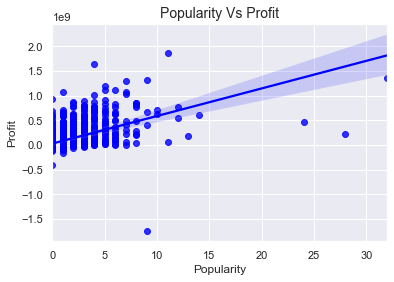

In [151]:
# Create a scatter plot to study relationship between popularity and porfit.

axis = sns.regplot(x=df['popularity'],y=df['profit'],color='blue')

#setup the title and the labels of the scatter plot.
axis.set_title("Popularity Vs Profit",fontsize=14)
axis.set_xlabel("Popularity",fontsize=12)
axis.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(5,3)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df['popularity'],df['profit'])   # to find the correclation between the data points

From the scatter plot, we can depicts that there is a positive relationship between popularity and profit. The trend line is on a upper direction and the correlation coefficient value is calculated to be positive with 0.55. Besides, the lower correlation coefficient value is less desirable and is probabily due to movies with high budget and low profit and Vice Versa.

# Question 4. Which years do movies made the maximum profits?

In [152]:
# Firstly grouping total profit by each years
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: profit, dtype: float64

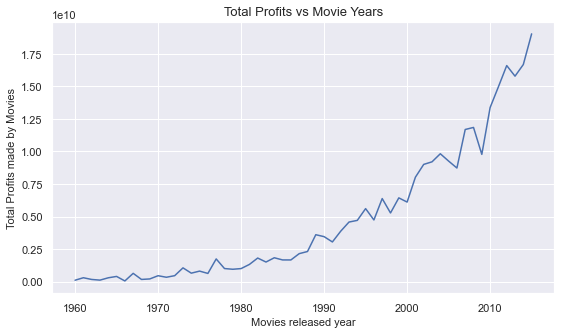

In [153]:
# plot the above query with linegraph.
profit_year.plot(figsize = (9,5))
plt.xlabel('Movies released year', fontsize = 11)
plt.ylabel('Total Profits made by Movies', fontsize = 11)
plt.title('Total Profits vs Movie Years', fontsize = 13);

The above line plot shows that profits increases as years increases.Its better to use line plot when data includes time and numbers.

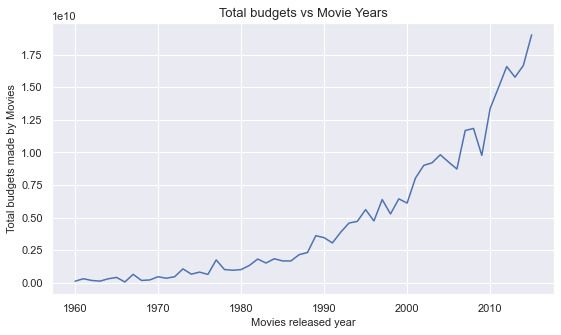

In [154]:
# Do the same for the budget
budget_year = df.groupby('release_year')['budget'].sum()
budget_year.head(5)

# plot the above query
profit_year.plot(figsize = (9,5))
plt.xlabel('Movies released year', fontsize = 11)
plt.ylabel('Total budgets made by Movies', fontsize = 11)
plt.title('Total budgets vs Movie Years', fontsize = 13);

The profit and budgets have same trends over the years. Both increases and peak at about year 2010. It make sense that great movies are done with more money and hard work.

# Question 5. What are the top casts, directors?

In [155]:
# to study about cast, we will separate each all people in each movie into every individuals.
df.loc[:,['original_title', 'cast', 'director']].head()

,original_title,cast,director
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan


In [156]:
def get_data(column_name):
    df['cast']=df['cast'].astype(str)
    df['director']=df['director'].astype(str)
    
    # From the column entered, separate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # Store the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

In [157]:
# Use the function for the casts.

cast_count = get_data('cast')
cast_count = pd.DataFrame(data=cast_count)

top_rated_cast = cast_count.head(10)
top_rated_cast

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Sylvester Stallone,34
Harrison Ford,34
Brad Pitt,34
Tom Hanks,34


In [158]:
# Use the same function for the directors too.

director_count = get_data('director')
director_count = pd.DataFrame(data=director_count)

top_director = director_count.head(10)
top_director

,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Martin Scorsese,17
Steven Soderbergh,17
Robert Rodriguez,17
Tim Burton,17
Robert Zemeckis,15
Oliver Stone,15


# Question 6. Which months have higher profits?

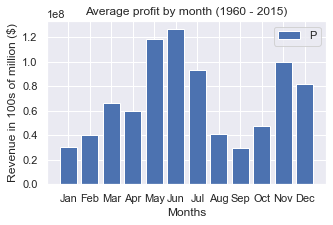

In [167]:
 # Extract the month of release for every movie in a new column

df['release_month']=df['release_date'].dt.month

profit_by_month = df.groupby('release_month')['profit'].mean()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Revenues = list(profit_by_month.to_numpy())
plt.bar(np.arange(0, 12), profit_by_month, tick_label = months, )
plt.title('Average profit by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');
plt.xlabel('Months');
plt.legend('Profit');

The bar chart proves that movie are sold more during summer and winter breaks. It makes sense because mostly people have school vacations and holidays during these time

# Conclusion

The TMDb movie dataset provide a plethora of  information on all movies. After doing Data Wrangling, null values, duplicated values and 0 values were removed to provide more accurate results. Also, wrong datatypes were corrected and new columns such as profit and monthly profit_average were created for further investigation.

Line plot, bar chart  were made to help visualizing and answer questions. From the results, it showed the top profits, budgets, casts, directors etc. it also showed the average profits made by each months. These provide valuable information on which movie characterists attracts more audience and how much more movies are sold compare to each months.

Profits: profits has positive relationship with budget and popularity
Runtime: Average of 101.22 minutes from all movies
Profit by months: May and June in summer time have high mean movie profits. Nov and Dec are the next two months with high mean movie profits.
Top 1 cast: Robert De Niro
Top 1 director: Steven Spielberg

# Limitation:

Even we successfully predited the above properties on TMDb movie dataset, there are many infomation removed such as rows contained 0 values and null values. The dataset was sliced by few thousand rows of movies, which would definitly affect the result. Also, every movies received different number of votes. Therefore, movies with fewer votes or higher votes would not be accurate. There should be a consistent way to collect the information in order to make it useful for analyzing the data.

# Sources

Pandas documents

Kaggle guide

github project

In [168]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295